# Проект: вариант 2 (исполнитель Сергей Камсарин) 
### https://t.me/KamisarNSK

In [1]:
# загузка используемых библиотек
import pandas as pd
import numpy as np
import pandahouse as ph
import requests
from urllib.parse import urlencode
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #для моды
from statistics import mode
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
from datetime import datetime
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from tqdm.auto import tqdm
from scipy.stats import norm
# подкорректируем размер выводимых графиков
sns.set(font_scale =1, style ="whitegrid", rc ={'figure.figsize':(18,8)})


## Задание 1. A/B–тестирование
### 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

### 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
https://disk.yandex.ru/d/UhyYx41rTt3clQ

groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
https://disk.yandex.ru/d/5Kxrz02m3IBUwQ

active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ

checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента.

https://disk.yandex.ru/d/pH1q-VqcxXjsVA

### 1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

    На какие метрики Вы смотрите в ходе анализа и почему?
    Имеются ли различия в показателях и с чем они могут быть связаны?
    Являются ли эти различия статистически значимыми?
    Стоит ли запускать новую механику на всех пользователей?
    Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

### 1.4 Требования к ответу

    При выполнении тестового задания необходимо использовать язык программирования Python. 
    В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
    Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.
    
## Задание 2. SQL
### 2.1 Очень усердные ученики.

#### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

### 2.1.2 Задача

Дана таблица default.peas:

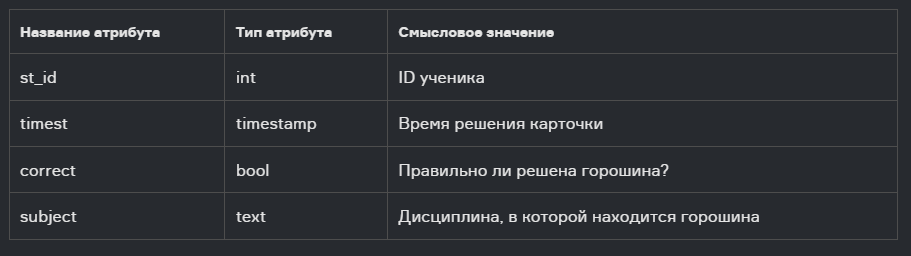

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

NB! Под очень усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

### 2.2 Оптимизация воронки

### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.


### 2.2.2 Задача

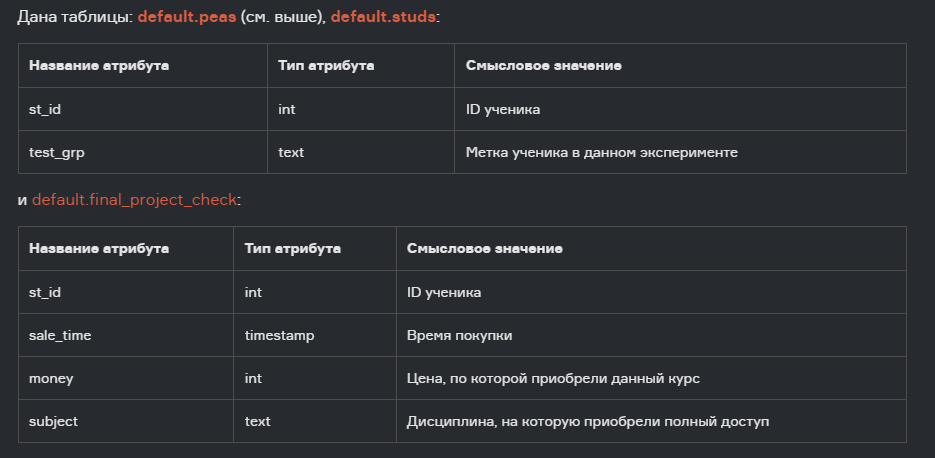

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

    ARPU 
    ARPAU 
    CR в покупку 
    СR активного пользователя в покупку 
    CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

# Все данные находятся в табличном виде в Clickhouse

## Задание 3. Python
### 3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла **groups_add.csv** (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

Нус... приступим)
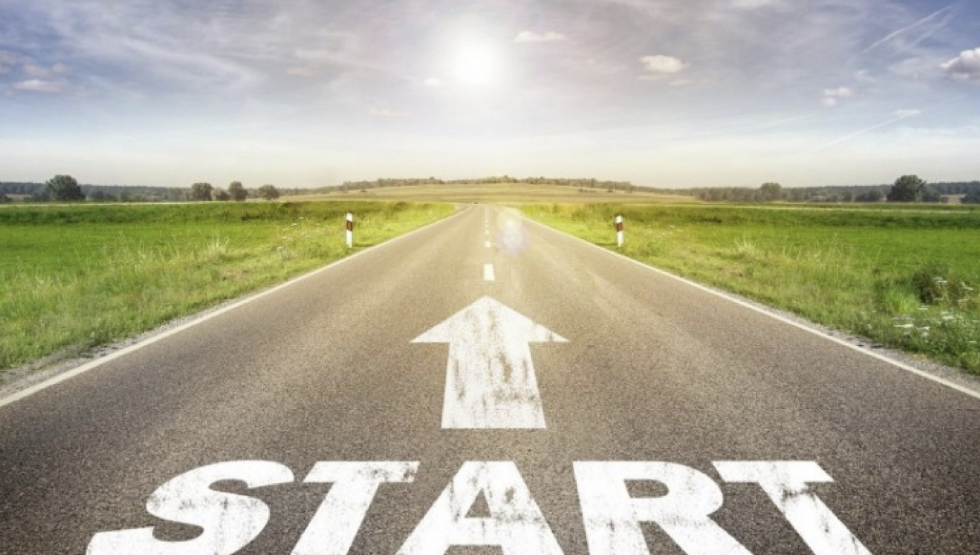

# Задание 1. A/B–тестирование

In [2]:
# публичные ссылки на файлы Яндекс.Диск
groups_pk = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
groups_add_pk = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
active_studs_pk = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
checks_pk = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
#Функция для получения загрузочной ссылки
def get_yandex_download_url(public_key):    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url
# Загружаем данные
# файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе 
# (А – контроль, B – целевая группа) 
groups = pd.read_csv(get_yandex_download_url(groups_pk),sep=';')
#  дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
groups_add = pd.read_csv(get_yandex_download_url(groups_add_pk),sep=',')
# файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.
active_studs = pd.read_csv(get_yandex_download_url(active_studs_pk),sep=',')
# файл с информацией об оплатах пользователей в дни проведения эксперимента.
checks = pd.read_csv(get_yandex_download_url(checks_pk),sep=';')

## Если выскакивает такое то переходим на запасной вариант загружаем данные с папки 
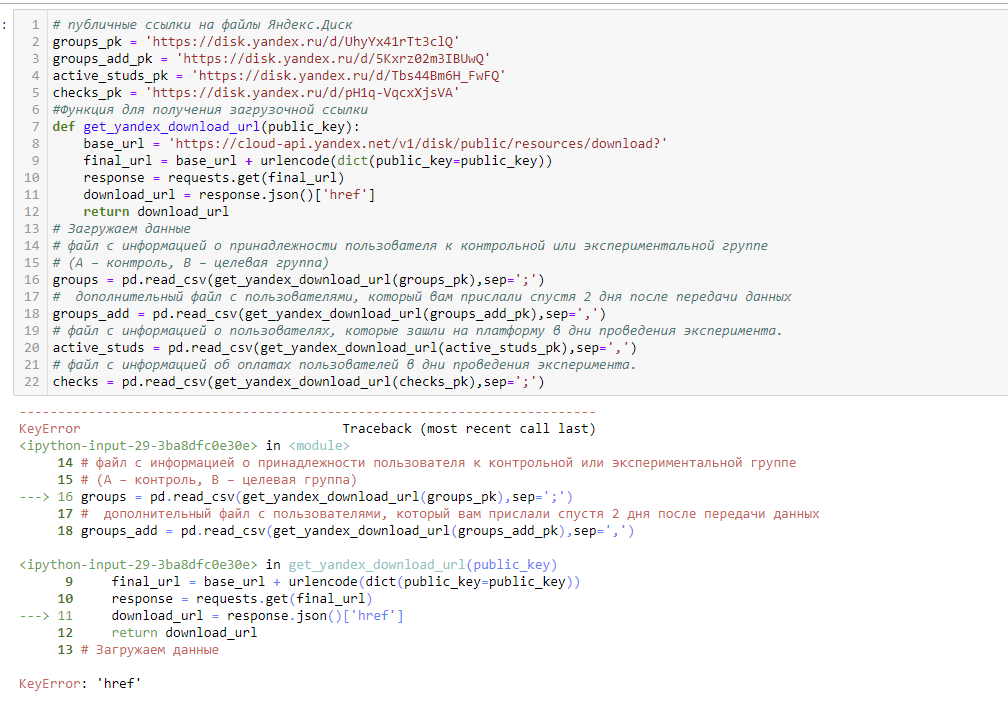

 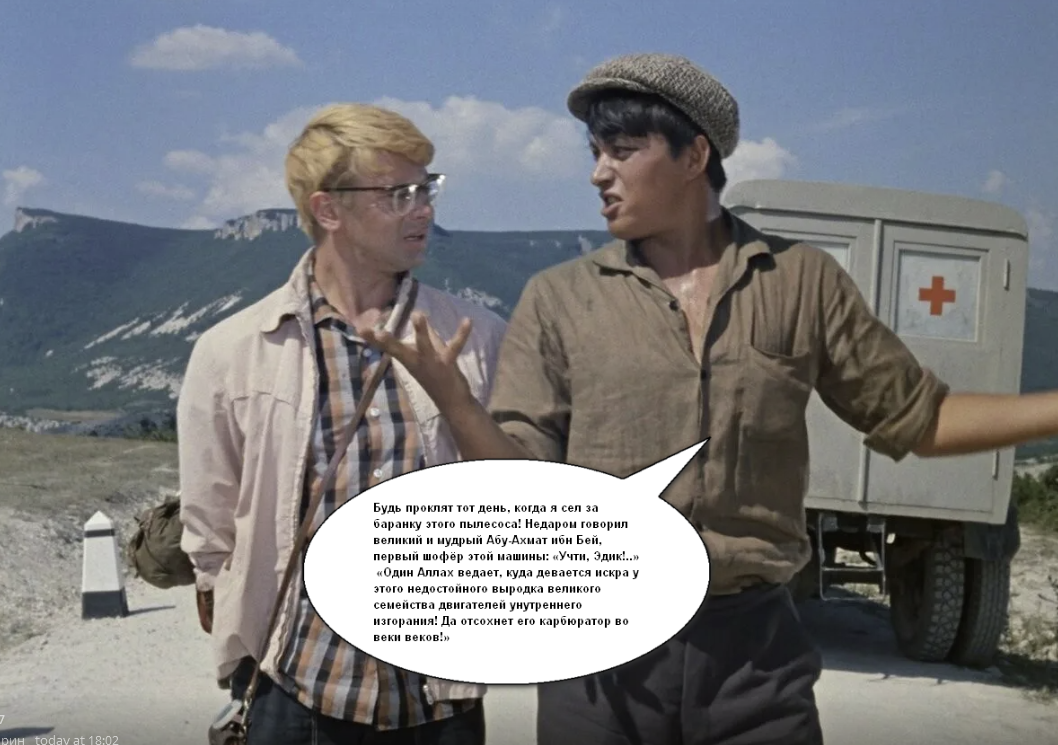
### Если "Искра пропала" переходим на  Запасной вариант

In [4]:
# # файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе 
# # (А – контроль, B – целевая группа) 
# groups = pd.read_csv('groups.csv',sep=';')
# #  дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
# groups_add = pd.read_csv('groups_add.csv',sep=',')
# # файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.
# active_studs = pd.read_csv('active_studs.csv',sep=',')
# # файл с информацией об оплатах пользователей в дни проведения эксперимента.
# checks = pd.read_csv('checks.csv',sep=';')

In [3]:
# чтоб восемь раз одно и тоже не писать) можно сделать функцию
def all_info(df):
    'функция для получения информации о датафрейме'
    print(df.head())
    print(df.info())
    print(f'Дубликатов :{df.duplicated().sum()}')

In [4]:
help(all_info)

Help on function all_info in module __main__:

all_info(df)
    функция для получения информации о датафрейме



In [5]:
all_info(groups)

     id grp
0  1489   B
1  1627   A
2  1768   B
3  1783   B
4  1794   A
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Дубликатов :0


In [6]:
all_info(groups_add)

        id grp
0  5694584   B
1  5694830   B
2  5695057   B
3  5698872   B
4  5699067   B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None
Дубликатов :0


In [7]:
all_info(active_studs)

   student_id
0      581585
1     5723133
2     3276743
3     4238589
4     4475369
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
None
Дубликатов :0


In [8]:
all_info(checks)

   student_id    rev
0        1627  990.0
1        3185  690.0
2       25973  690.0
3       26280  690.0
4      100300  990.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None
Дубликатов :0


### 1.3 Вопросы

    1. На какие метрики Вы смотрите в ходе анализа и почему?
    2. Имеются ли различия в показателях и с чем они могут быть связаны?
    3. Являются ли эти различия статистически значимыми?
    4. Стоит ли запускать новую механику на всех пользователей?
    5. Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

# По легенде groups_add.csv я еще не получил и не знаю о его существовании ) и поэтому все вычисления делаем без него

###### Создадим общий датафрейм возьмем данные тех кто участвовал в тесте заходил в приложение и делал оплаты 

In [9]:
# Создадим общий датафрейм возьмем данные тех кто участвовал в тесте заходил в приложение и делал оплаты 
data = groups.merge(active_studs,how='left', left_on='id', right_on = 'student_id')
data = data.merge(checks, how='left',on = 'student_id')
all_info(data)


     id grp  student_id    rev
0  1489   B         NaN    NaN
1  1627   A      1627.0  990.0
2  1768   B         NaN    NaN
3  1783   B         NaN    NaN
4  1794   A         NaN    NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74484 entries, 0 to 74483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          74484 non-null  int64  
 1   grp         74484 non-null  object 
 2   student_id  8328 non-null   float64
 3   rev         391 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB
None
Дубликатов :0


###### для анализа нам нужны только те кто заходил в приложение.. и суммы оплат... либо 0 если оплаты небыло

In [10]:
# кто заходил в приложение но не сделал оплату -будут пропущены значения(нет денег) - заменим на 0
data_test = data[data['student_id'].isna()==False]
data_test.rev.fillna(0, inplace=True)
all_info(data_test)

      id grp  student_id    rev
1   1627   A      1627.0  990.0
10  2085   B      2085.0    0.0
12  2215   B      2215.0    0.0
43  3391   A      3391.0    0.0
45  3401   B      3401.0    0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 1 to 74469
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8328 non-null   int64  
 1   grp         8328 non-null   object 
 2   student_id  8328 non-null   float64
 3   rev         8328 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 325.3+ KB
None
Дубликатов :0


In [11]:
data_test.groupby('grp').rev.describe()

,count,mean,std,min,25%,50%,75%,max
grp,,,,,,,,
A,1535.0,47.439739,290.766992,0.0,0.0,0.0,0.0,3660.0
B,6793.0,57.864567,313.197487,0.0,0.0,0.0,0.0,4650.0


In [12]:
# поделим на группы
a_control = data_test[data_test['grp'] == 'A'][[ 'id','rev']].reset_index().drop(['index'] ,axis=1)
b_test = data_test[data_test['grp'] == 'B'][[ 'id','rev']].reset_index().drop(['index'] ,axis=1)
all_info(a_control)
all_info(b_test)

       id    rev
0    1627  990.0
1    3391    0.0
2  109623    0.0
3  133678    0.0
4  175944    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1535 non-null   int64  
 1   rev     1535 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 24.1 KB
None
Дубликатов :0
      id  rev
0   2085  0.0
1   2215  0.0
2   3401  0.0
3  22994  0.0
4  26899  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6793 entries, 0 to 6792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6793 non-null   int64  
 1   rev     6793 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 106.3 KB
None
Дубликатов :0


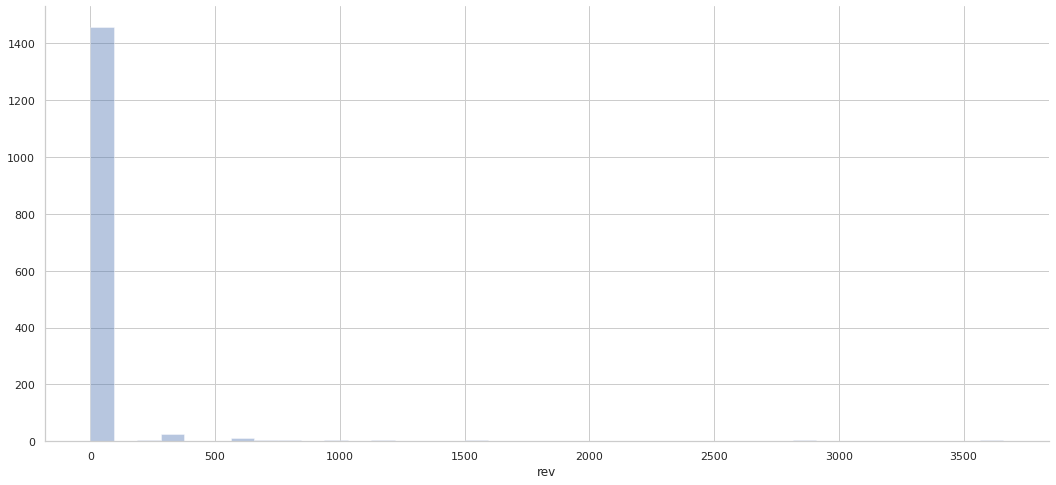

In [13]:
sns.distplot(a_control.rev, kde=False)
sns.despine()

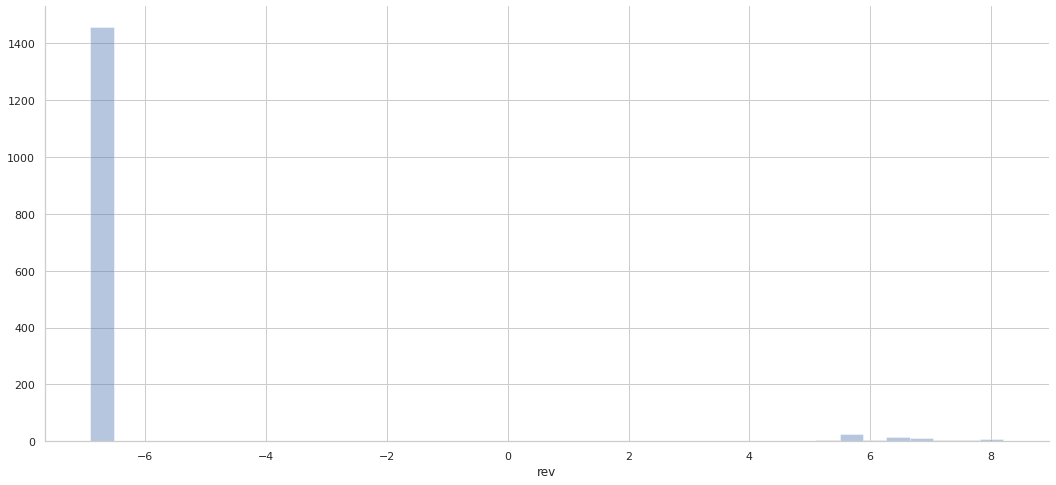

In [14]:
sns.distplot(np.log(a_control.rev+0.001), kde=False)
sns.despine()

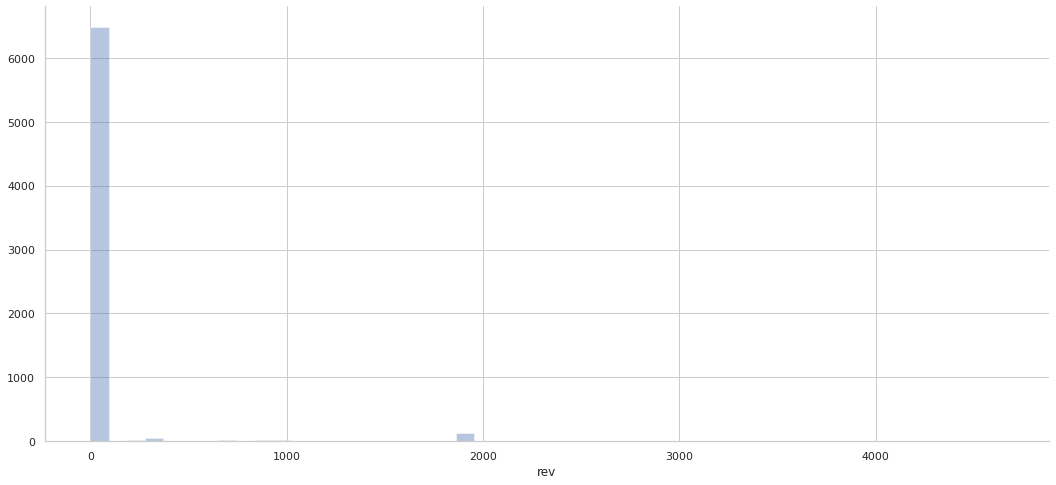

In [15]:
sns.distplot(b_test.rev, kde=False)
sns.despine()

### 1.3.1. На какие метрики Вы смотрите в ходе анализа и почему?

### Создадим следующие параметры:
    
**CR** (конверсия платежей) - отношение количества оплативших клиентов к  числу посетивших приложение.
поможет понять где клиенту проще и комфортнее сделать оплату

**ARPU** - отношение общей суммы платежей на количество пользователей зашедших в приложение.
Важно бизнеса, при увеличении этого показателя бизнес получает больше денег(в среднем от всех)

**ARPPU** - отношение общей суммы платежей на количество активных оплативших пользователей.
важно для бизнеса, при увеличении этого показателя бизнес получает больше денег(в среднем от одного)


In [16]:
# Функции для ленивых
def cr(x):
    'Высчитываем CR из датафрейма по столбцу ["rev"]'
    return round((len(x[x['rev']> 0]) / len(x)),4)

def arpu(x):
    'Высчитываем ARPU из датафрейма по столбцу ["rev"]'
    return round(np.mean(x['rev']), 4)

def arppu(x):
    'Высчитываем ARPPU из датафрейма по столбцу ["rev"]'
    return round((np.sum(x['rev']) / len(x[x['rev']> 0])),4)

### Подсчитаем наши метрики

In [17]:
print(f'Группа А(контроль) CR: {cr(a_control)} ARPU: {arpu(a_control)} ARPPU: {arppu(a_control)}')
print(f'Группа  Б(тест)    CR: {cr(b_test)} ARPU: {arpu(b_test)} ARPPU: {arppu(b_test)}')

Группа А(контроль) CR: 0.0508 ARPU: 47.4397 ARPPU: 933.5897
Группа  Б(тест)    CR: 0.0461 ARPU: 57.8646 ARPPU: 1255.8275


### 1.3.2 Имеются ли различия в показателях и с чем они могут быть связаны?

###### смотрм на всех 

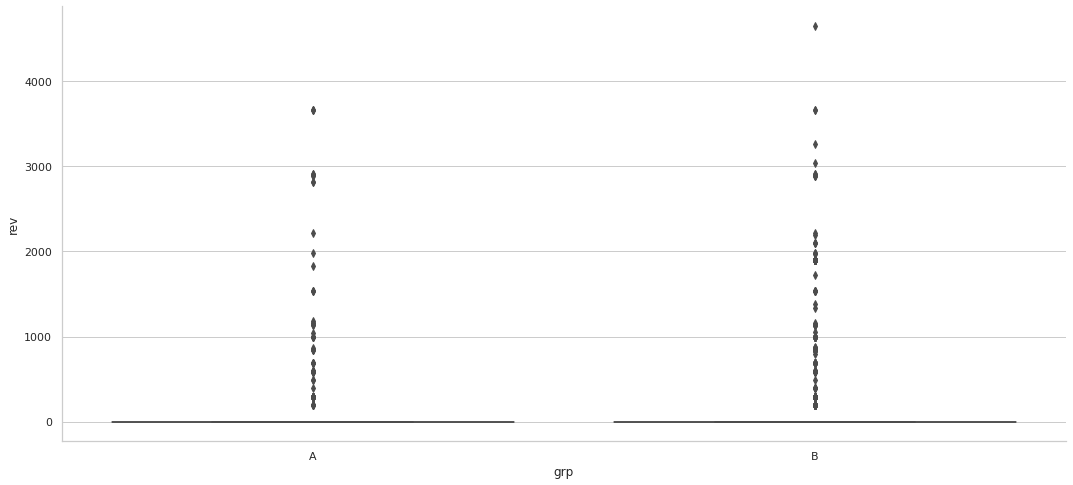

In [18]:
sns.boxplot(data=data_test, y='rev', x='grp')
sns.despine()

##### смотрим на платежи в групах

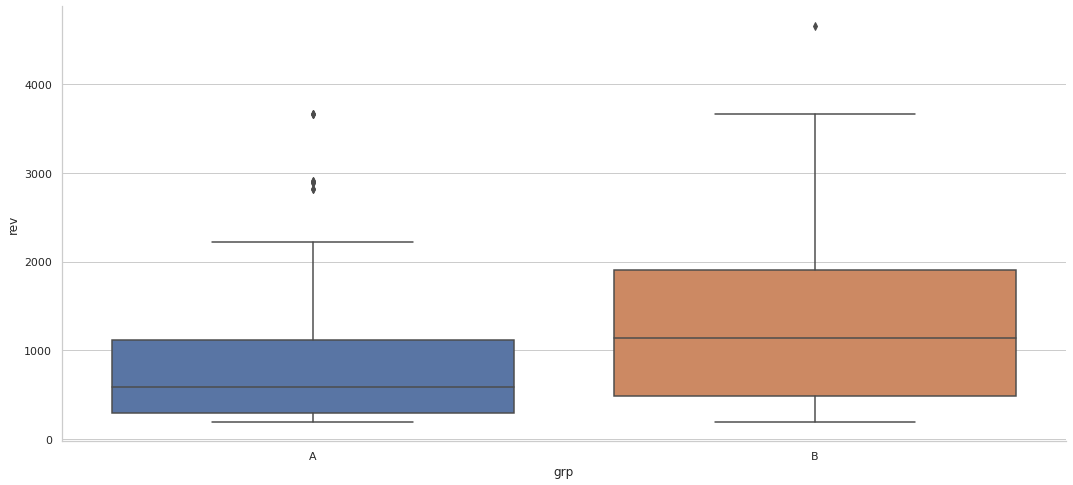

In [19]:
sns.boxplot(data=data_test[data_test['rev'] >0], y='rev', x='grp')
sns.despine()

In [20]:
print(f'Наблюдаем изменение конверсии(CR) {round(100*((-cr(a_control)+cr(b_test))/cr(a_control)), 3)} %')
print(f'Наблюдаем изменение дохода с пользователя (ARPU) {round(100*((-arpu(a_control)+arpu(b_test))/arpu(a_control)),3)} %')
print(f'Наблюдаем изменение дохода с покупателя (ARPU) {round(100*((-arppu(a_control)+arppu(b_test))/arppu(a_control)),3)} %')
# связано c отсечением части пользователей платящих малые суммы с одновременным увеличением среднего чека.

Наблюдаем изменение конверсии(CR) -9.252 %
Наблюдаем изменение дохода с пользователя (ARPU) 21.975 %
Наблюдаем изменение дохода с покупателя (ARPU) 34.516 %


### увеличился средний чек но конверсия упала.. вероятно стало неудобно переводить меньшие суммы... может комисии какие ( не выгодные для мелких сумм)?

### 1.3.3 Являются ли эти различия статистически значимыми?

### Размеры групп очень сильно отличаются, поэтому классические тесты могут давать большие погрешности( но для интереса попробуем конечно, но  не будем их учитывать для вывода)
#### Распределение признаков в группах не нормальные 

### Сравним средние значения наших параметров в тестовой и контрольной  группах  
- Нулевая Гипотеза **H0**: Средние значения в двух группах не различаются
- Альтенативная Гипотеза **H1**: Средние значения различаются

### Возьмем U-тест критерий Манна-Уитни. 
Он даёт ответ на вопрос, значимо ли различаются распределения или нет.

In [21]:
mannwhitneyu(a_control.rev, b_test.rev)

MannwhitneyuResult(statistic=5235110.0, pvalue=0.4908589066101978)

- по критерию Манна-Уитни **pvalue > 0.05** мы **НЕ можем** отклонить гипотезу что НЕТ значимых различий между групп

###### ....ну а почему бы и нет?)

In [22]:
ttest_ind(a_control.rev, b_test.rev)

Ttest_indResult(statistic=-1.1930594262053686, pvalue=0.2328800964324922)

- по T-критерию Стьюдента **pvalue > 0.05** мы **НЕ можем** отклонить гипотезу что НЕТ значимых различий между групп

### и Метод Bootstrap( он позволит сбалансировать наши выборки) на него и будем пологатся
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать.. и можем сразу 

сравнить наши параметры

In [23]:
def get_bootstrap(
    df1, # датафрейм 1 выборки
    df2, # датафрейм 2 выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика arpu выходит
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    data_column_1 = df1['rev']
    data_column_2 = df2['rev']
    boot_len  = max([len(data_column_1), len(data_column_2)])
    
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [24]:
# Подкорректируем функции для бутстрапа
def cr_col(x):
    'Высчитываем CR из  столбца '
    return (len([i for i in x if i>0]) / len(x))
def arpu_col(x):
    'Высчитываем ARPU  по столбцу '
    return np.mean(x)

def arppu_col(x):
    'Высчитываем ARPPU из датафрейма столбцу'
    return np.sum(x) / len([i for i in x if i>0]) 


###### проверим ARPPU

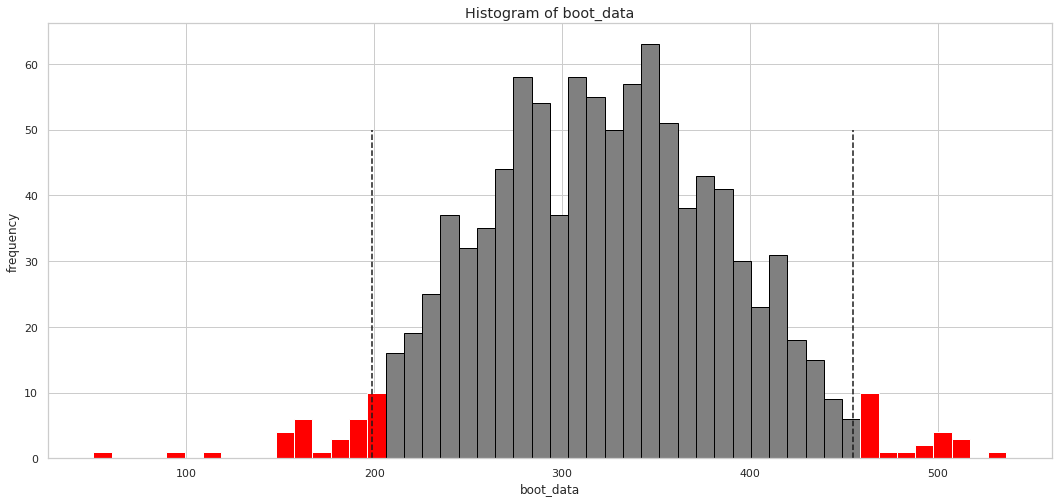

In [25]:
booted_data_arppu = get_bootstrap( b_test,a_control, statistic=arppu_col) # поменял местами группы чтоб - не рисовало -

In [26]:
booted_data_arppu["p_value"]

1.662689391119277e-06

##### Вывод по бутстрапу (ARPPU):
ARPPU в тестовой и контрольной группах различаются на заданном уровне значимости, поскольку в 95-процентный доверительный интервал не попадает нулевое значение разницы между двумя средними.

p-value < 0.05 говорит о том, что при условии верности нулевой гипотезы о равенстве ARPPU в двух группах вероятность получить такое или еще большее отклонение разницы от 0 составляет менее 5%.

То есть полученная нами разница оказалась бы достаточно редким явлением, если бы средние двух групп на самом деле были равны.

Значит, мы имеем основание отвергнуть нулевую гипотезу в пользу альтернативной.

*Полученная нами разница -  это средняя разница между ARPPU  бутстрап-выборок.

### проверим ARPU

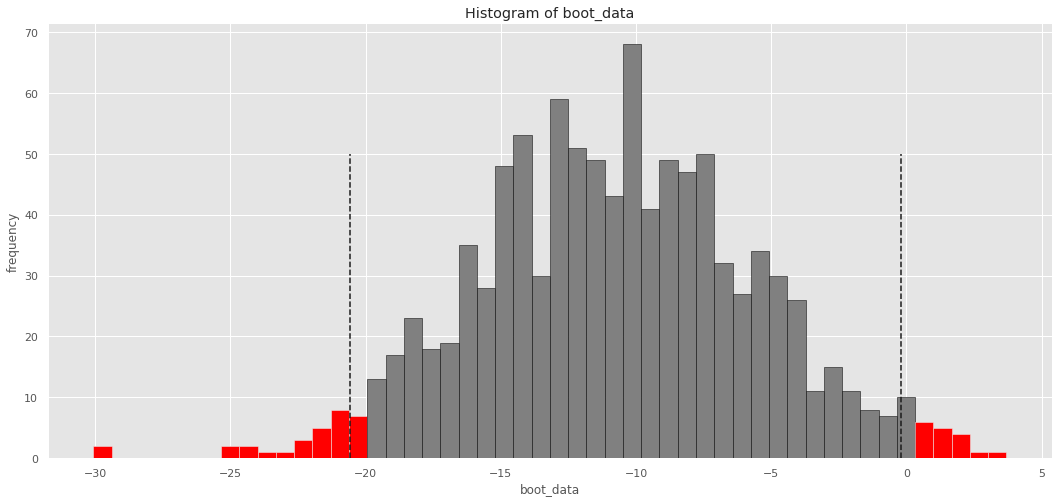

In [27]:

booted_data_arpu = get_bootstrap(a_control, b_test) #по умолчанию ARPU и выходит)

In [28]:
booted_data_arpu["p_value"]

0.03474075480422986

##### Вывод по бутстрапу (np.mean) он же ARPU:
Средние значения в тестовой и контрольной группах различаются на заданном уровне значимости, поскольку в 95-процентный доверительный интервал не попадает нулевое значение разницы между двумя средними.

p-value < 0.05 говорит о том, что при условии верности нулевой гипотезы о равенстве средних в двух группах вероятность получить такое или еще большее отклонение разницы от 0 составляет менее 5%.

То есть полученная нами разница оказалась бы достаточно редким явлением, если бы средние двух групп на самом деле были равны.

Значит, мы имеем основание отвергнуть нулевую гипотезу в пользу альтернативной.

*Полученная нами разница - это средняя разница между средними значениями бутстрап-выборок.

### проверим CR

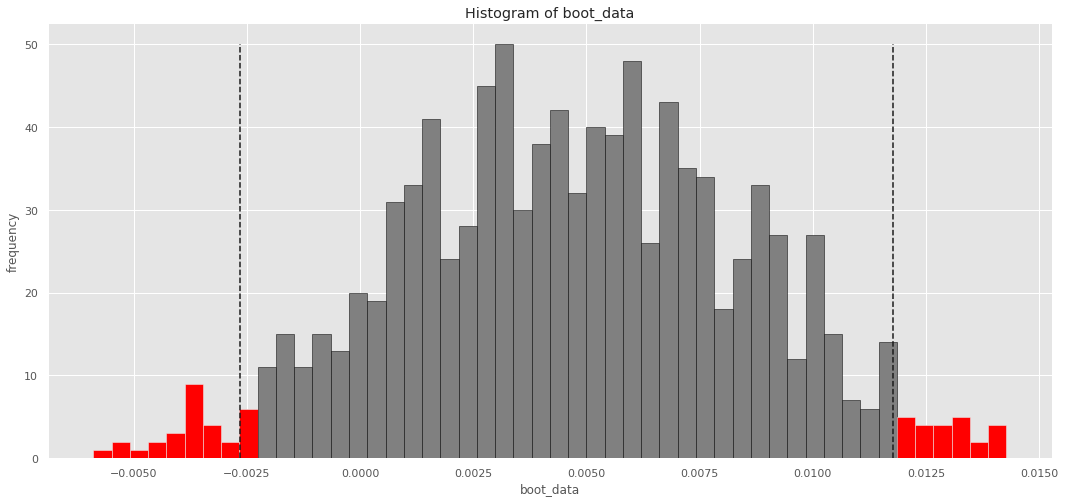

In [29]:

booted_data_cr = get_bootstrap(a_control, b_test, statistic=cr_col)

In [30]:
booted_data_cr['p_value']

0.2136414411185854

##### Вывод по бутстрапу (CR):
CR в тестовой и контрольной группах не различаются на заданном уровне значимости, поскольку в 95-процентный доверительный интервал попадает нулевое значение разницы между CR двух групп.

**p-value > 0.05** говорит о том, что при условии верности нулевой гипотезы о равенстве CR в двух группах вероятность получить такое или еще большее отклонение разницы от 0 составляет более 5%. То есть полученная нами разница не оказалась бы редким явлением, если бы CR двух групп на самом деле были равны. Значит, мы не имеем весомых оснований отвергнуть нулевую гипотезу и остаемся в ее рамках.

*Полученная нами разница - это средняя разница между CR бутстрап-выборок.

## Ответ:  различия в группах  по ARPU и ARPPU статистически значимы

### 1.3.4 Стоит ли запускать новую механику на всех пользователей?

## Да мы имеем статистически значимые различия в пользу увелечения среднего чека и на покупателя и на пользователя, причем CR статистически значимо не различаются, значит имеем основание отвергнуть "0" гипотезу и запустить новую механику на всех

# Задание 2. SQL
## 2.1 Очень усердные ученики.
### 2.1.1 Условие
Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

###### самым самым оптимальным) было просто посмореть какие данные есть у нас в таблице и на основе этого сделать запрос)))

SELECT min( timest ), max( timest )
FROM peas
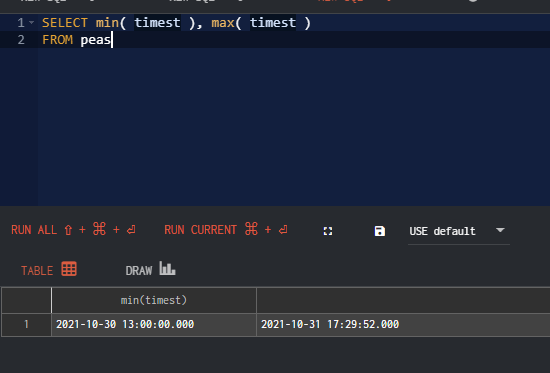
у нас данных только 2 дня можно схалтурить)

In [31]:
# # запрос когда мы знаем) что всего 2 дня текущего месяца
# SELECT COUNT(st_id)
#  FROM
#     (SELECT  st_id , SUM( correct )
#     FROM peas 
#     GROUP BY  st_id 
#     HAVING SUM( correct ) >=20)

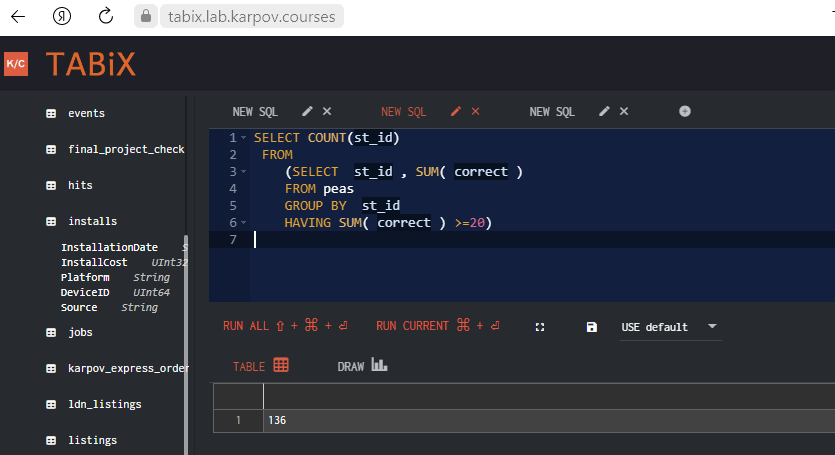

### Ну поиграем в легенду что данных много)

In [32]:
# SELECT COUNT(st_id)
#  FROM
#     (SELECT  st_id ,toStartOfMonth(timest) AS month, SUM( correct )
#     FROM default.peas
#     WHERE toStartOfMonth(timest) = MAX(toStartOfMonth(timest))
#     GROUP BY  st_id, month 
#     HAVING SUM( correct ) >=20)

в Redash как-то попривычнее)
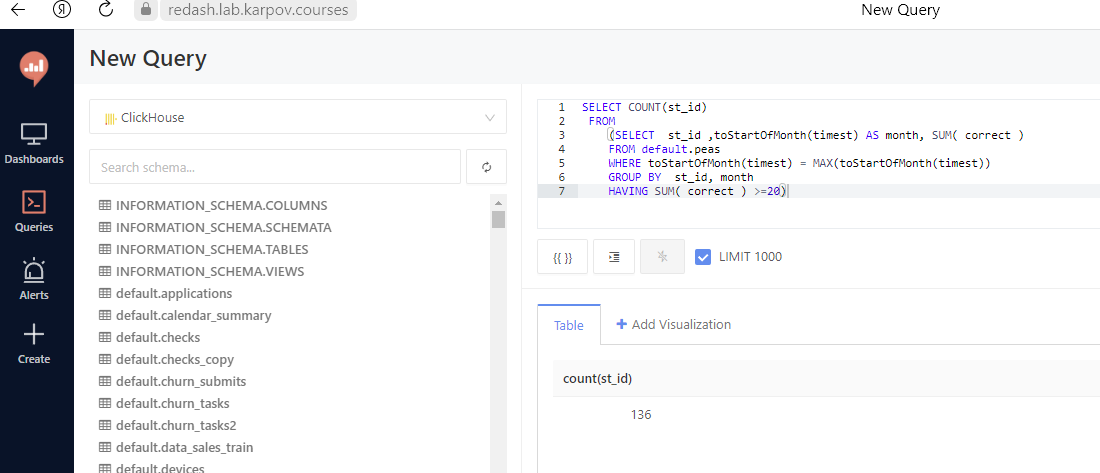
Ух) опять  136)))

### Ну что же мы это туда сюда бегаем ) картинки скриним? а давайте отсюда загрузим))

In [33]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [34]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
    SELECT COUNT(st_id)
    FROM
    (SELECT  st_id ,toStartOfMonth(timest) AS month, SUM( correct )
    FROM default.peas
    WHERE toStartOfMonth(timest) = MAX(toStartOfMonth(timest))
    GROUP BY  st_id, month 
    HAVING SUM( correct ) >=20)
  
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,count(st_id)
0,136


#### Очень усердных студентов у нас 136

## 2.2 Оптимизация воронки
### 2.2.1 Условие
Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

### 2.2.2 Задача


Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

    ARPU 
    ARPAU 
    CR в покупку 
    СR активного пользователя в покупку 
    CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.


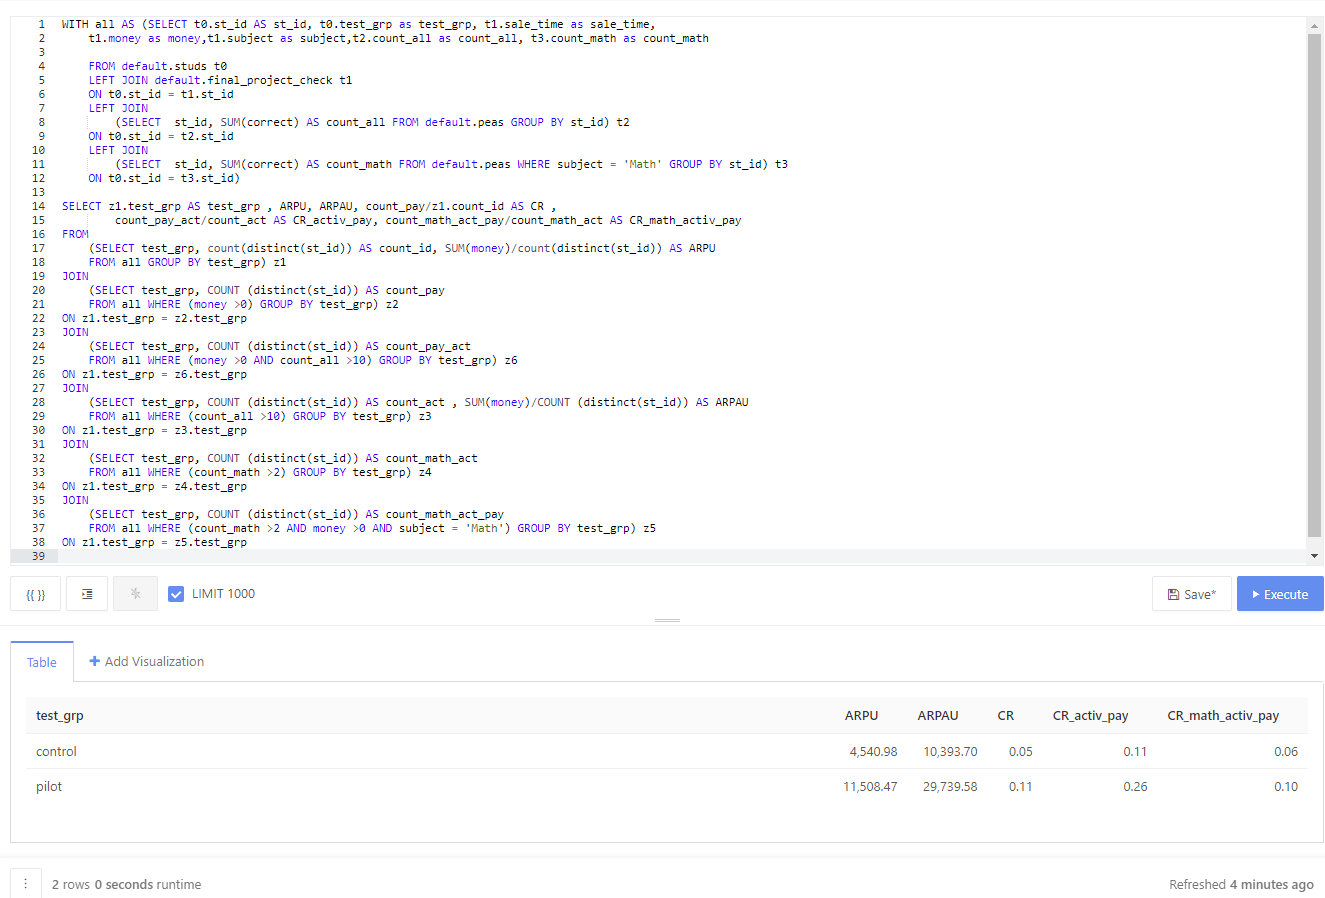

In [35]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
   WITH all AS (SELECT t0.st_id AS st_id, t0.test_grp as test_grp, t1.sale_time as sale_time,
    t1.money as money,t1.subject as subject,t2.count_all as count_all, t3.count_math as count_math
    
    FROM default.studs t0
    LEFT JOIN default.final_project_check t1
    ON t0.st_id = t1.st_id
    LEFT JOIN
        (SELECT  st_id, SUM(correct) AS count_all FROM default.peas GROUP BY st_id) t2
    ON t0.st_id = t2.st_id
    LEFT JOIN
        (SELECT  st_id, SUM(correct) AS count_math FROM default.peas WHERE subject = 'Math' GROUP BY st_id) t3
    ON t0.st_id = t3.st_id)

SELECT z1.test_grp AS test_grp , ARPU, ARPAU, count_pay/z1.count_id AS CR ,
        count_pay_act/count_act AS CR_activ_pay, count_math_act_pay/count_math_act AS CR_math_activ_pay
FROM
    (SELECT test_grp, count(distinct(st_id)) AS count_id, SUM(money)/count(distinct(st_id)) AS ARPU
    FROM all GROUP BY test_grp) z1
JOIN
    (SELECT test_grp, COUNT (distinct(st_id)) AS count_pay
    FROM all WHERE (money >0) GROUP BY test_grp) z2
ON z1.test_grp = z2.test_grp
JOIN
    (SELECT test_grp, COUNT (distinct(st_id)) AS count_pay_act
    FROM all WHERE (money >0 AND count_all >10) GROUP BY test_grp) z6
ON z1.test_grp = z6.test_grp
JOIN
    (SELECT test_grp, COUNT (distinct(st_id)) AS count_act , SUM(money)/COUNT (distinct(st_id)) AS ARPAU 
    FROM all WHERE (count_all >10) GROUP BY test_grp) z3
ON z1.test_grp = z3.test_grp
JOIN
    (SELECT test_grp, COUNT (distinct(st_id)) AS count_math_act
    FROM all WHERE (count_math >2) GROUP BY test_grp) z4
ON z1.test_grp = z4.test_grp
JOIN
    (SELECT test_grp, COUNT (distinct(st_id)) AS count_math_act_pay
    FROM all WHERE (count_math >2 AND money >0 AND subject = 'Math') GROUP BY test_grp) z5
ON z1.test_grp = z5.test_grp
   
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test_2 = ph.read_clickhouse(query=q, connection=connection_default)
q_test_2

,test_grp,ARPU,ARPAU,CR,CR_activ_pay,CR_math_activ_pay
0,control,4540.983607,10393.700787,0.049180,0.110236,0.061224
1,pilot,11508.474576,29739.583333,0.108475,0.260417,0.095238


## Задание 3. Python
### 3.1 Задача
Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла **groups_add.csv** (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики. 

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

### ps... ну не будем копировать) загрузку всех файлов  с Яндекс Диска  они уже у нас есть 


### 3 файла у нас уже есть.. их передадим по умолчанию

In [36]:
# ссылка на новый файл
link = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'

In [37]:
def new_data(link_or_file, groups=groups,checks=checks,active_studs=active_studs):
    '''
    передаем в функцию 3 файла CSV которые у нас есть или используем параметры по умолчанию 
    и ссылку на диск того что надо добавить   
    скачивание с диска иногда начинает глючить .... тогда
    название файла с расшиирением CSV который лежит в той же папке что и ноутбук
    получаем датафрейм для дальнейшего анализа
    возвращаем датафрейм с метриками и обобщеный датафрейм с участниками теста
    вдруг кто то еще что то забыл и придется снова пересчитывать
    тогда groups= передать файл
    '''

    if link_or_file.startswith('https://'):
        def get_yandex_download_url(public_key):    
            base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
            final_url = base_url + urlencode(dict(public_key=public_key))
            response = requests.get(final_url)
            download_url = response.json()['href']
            return download_url

        # скачиваем дополнительный файл
        groups_add = pd.read_csv(get_yandex_download_url(groups_add_pk),sep=',')
    else:
        # или открываем файл если очередной глюк с загрузкой
        groups_add = pd.read_csv(link_or_file, sep=',')
    # на случай если колонки местами перепутаны находим где циферки то значит ID  
    if str(groups_add.iloc[0,0]).isdigit():
        groups_add.columns = ['id', 'grp']
    else:
        groups_add.columns = ['grp', 'id']
    # соединяем данные 
    group_new = groups.append(groups_add, ignore_index=True)
    data_new = group_new.merge(active_studs,how='left', left_on='id', right_on = 'student_id')
    data_new = data_new.merge(checks, how='left',on = 'student_id')
    data_test_new = data_new[data_new['student_id'].isna()==False]
    data_test_new.rev.fillna(0, inplace=True)
    all_info(data_test_new)
    a_control_new = data_test_new[data_test_new['grp'] == 'A'][[ 'id','rev']].reset_index().drop(['index'] ,axis=1)
    b_test_new = data_test_new[data_test_new['grp'] == 'B'][[ 'id','rev']].reset_index().drop(['index'] ,axis=1)
    print(f'Группа A(контроль) COUNT: {len(a_control_new)} CR: {cr(a_control_new)} ARPU: {arpu(a_control_new)} ARPPU: {arppu(a_control_new)}')
    print(f'Группа  B(тест)    COUNT: {len(b_test_new)} CR: {cr(b_test_new)} ARPU: {arpu(b_test_new)} ARPPU: {arppu(b_test_new)}')
    metrics = pd.DataFrame([['A', len(a_control_new),cr(a_control_new), arpu(a_control_new),arppu(a_control_new)], 
                            ['B', len(b_test_new),cr(b_test_new),arpu(b_test_new),arppu(b_test_new)]], 
                           columns=['group', 'amount','cr','arpu', 'arppu'])

    
    
    return(metrics, group_new)

In [38]:
# ссылка на новый файл
link = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
df_new = new_data(link)

      id grp  student_id    rev
1   1627   A      1627.0  990.0
10  2085   B      2085.0    0.0
12  2215   B      2215.0    0.0
43  3391   A      3391.0    0.0
45  3401   B      3401.0    0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 1 to 74562
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8341 non-null   int64  
 1   grp         8341 non-null   object 
 2   student_id  8341 non-null   float64
 3   rev         8341 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 325.8+ KB
None
Дубликатов :0
Группа A(контроль) COUNT: 1538 CR: 0.0507 ARPU: 47.3472 ARPPU: 933.5897
Группа  B(тест)    COUNT: 6803 CR: 0.0462 ARPU: 58.0588 ARPPU: 1257.879


###### если по ссылке опять начнет выдавать ограничение / грузим с папки...

In [104]:
# df_new = new_data('groups_add.csv')

      id grp  student_id    rev
1   1627   A      1627.0  990.0
10  2085   B      2085.0    0.0
12  2215   B      2215.0    0.0
43  3391   A      3391.0    0.0
45  3401   B      3401.0    0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 1 to 74562
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8341 non-null   int64  
 1   grp         8341 non-null   object 
 2   student_id  8341 non-null   float64
 3   rev         8341 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 325.8+ KB
None
Дубликатов :0
Группа A(контроль) COUNT: 1538 CR: 0.0507 ARPU: 47.3472 ARPPU: 933.5897
Группа  B(тест)    COUNT: 6803 CR: 0.0462 ARPU: 58.0588 ARPPU: 1257.879


In [39]:
df_new[0] # Это  метрики

,group,amount,cr,arpu,arppu
0,A,1538,0.0507,47.3472,933.5897
1,B,6803,0.0462,58.0588,1257.8790


In [40]:
all_info(df_new[1]) # это обобщенные данные

     id grp
0  1489   B
1  1627   A
2  1768   B
3  1783   B
4  1794   A
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74576 non-null  int64 
 1   grp     74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Дубликатов :0


In [41]:
def drow_metrics(metrics):
    'функция принимает датафрейм с 4 метриками для двух групп и рисует графики'
    fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize = (16, 8)) 

    axs[0][0].bar(metrics.group, metrics.amount, color=['red', 'green'], alpha=0.5)
    axs[0][0].set_title('COUNT')

    axs[0][1].bar(metrics.group, metrics.cr,  color=['red', 'green'], alpha=0.5)
    axs[0][1].set_title('CR')
                     
    axs[1][0].bar(metrics.group, metrics.arpu, color=['red', 'green'], alpha=0.5)
    axs[1][0].set_title('ARPU')

    axs[1][1].bar(metrics.group, metrics.arppu,  color=['red', 'green'], alpha=0.5)
    axs[1][1].set_title('ARPPU')

    plt.show()

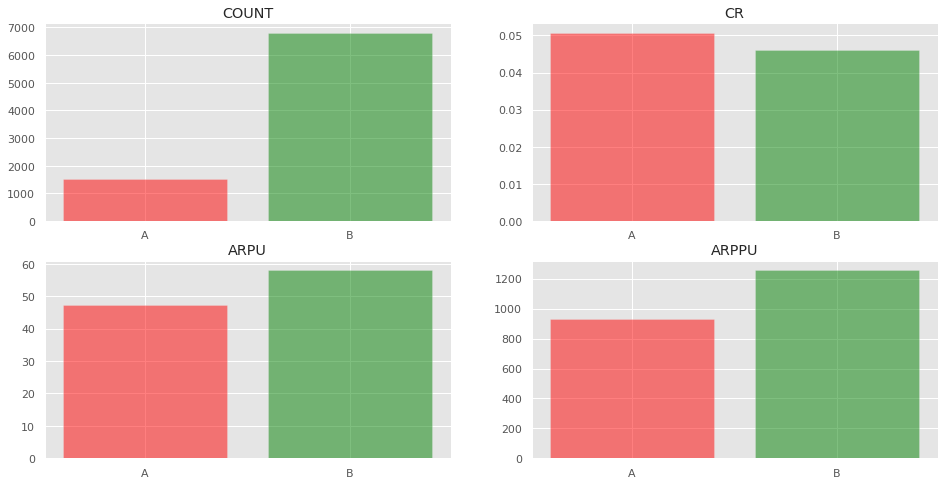

In [42]:
drow_metrics(df_new[0])

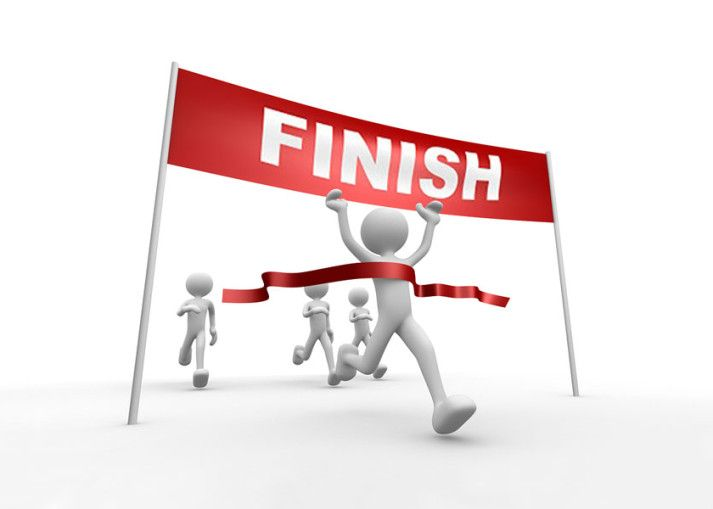

# Спасибо Вам Всем, из Karpov.courses!!! 
## Вы реально сотворили хороший курс!!
с уваженим Сергей Камсарин
https://t.me/KamisarNSK